In [45]:
##Name -- Rishav Kumar
##Roll No -- m22ai613

import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import os
import cv2
from keras.layers import Dense, Flatten

In [7]:
# Define the paths to your image folders
train_path = 'C:\\Users\\rsa33\\OneDrive\\Desktop\\Gurumukhi\\'
val_path =   'C:\\Users\\rsa33\\OneDrive\\Desktop\\Gurumukhi\\'

In [8]:
# Set the path to the folder containing the 'train' folder
data_dir = train_path
# Set the image size
img_size = (32, 32)
# Create empty lists for the images and labels
images = []
labels = []
# Loop over each folder from '0' to '9'
for label in range(10):
    folder_path = os.path.join(data_dir, 'train', str(label))
     # Loop over each image in the folder
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        if file_path.endswith(('.tiff','.bmp')):
            # Load the image and resize it to the desired size
            img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, img_size)
            # Append the image and label to the lists
            images.append(img)
            labels.append(label)
images = np.array(images)
labels = np.array(labels)
# Save the arrays in NumPy format
np.save('x_train.npy', images)
np.save('y_train.npy', labels)

In [11]:
# Set the path to the folder containing the 'val' folder
data_dir_val = val_path
# Set the image size
img_size_val = (32, 32)
# Create empty lists for the images and labels
images_val = []
labels_val = []
# Loop over each folder from '0' to '9'
for label in range(10):
    folder_path = os.path.join(data_dir_val, 'val\\', str(label))
    # Loop over each image in the folder
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        if file_path.endswith(('.tiff','.bmp')):
            # Load the image and resize it to the desired size
            img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, img_size_val)
            # Append the image and label to the lists
            images_val.append(img)
            labels_val.append(label)
# Convert the lists to NumPy arrays
images_val = np.array(images_val)
labels_val = np.array(labels_val)
# Save the arrays in NumPy format
np.save('x_test.npy', images_val)
np.save('y_test.npy', labels_val)

In [12]:
# Load the dataset
x_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')
x_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')

1000
178
(1000, 32, 32)
(178, 32, 32)


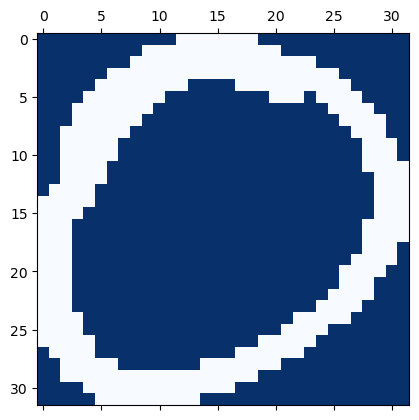

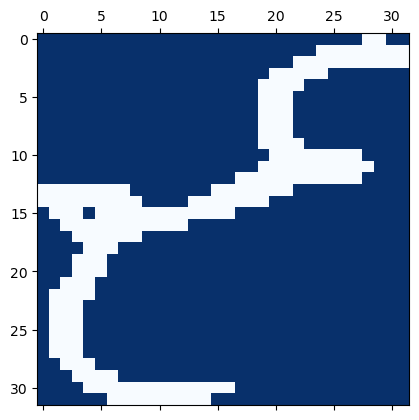

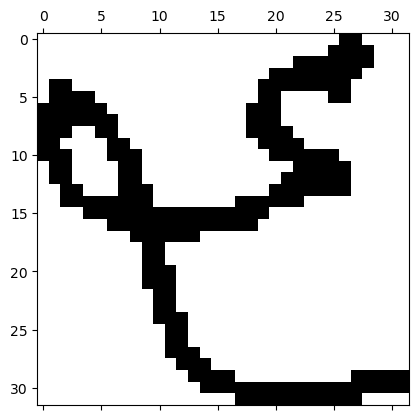

In [33]:
# test the images are loaded correctly
print(len(x_train))
print(len(x_test))
x_train[0].shape
x_train[0]
plt.matshow(x_train[0], cmap='Blues')
plt.matshow(x_train[999],cmap='Blues')
print(x_train.shape)
print(x_test.shape)
y_train
y_test
plt.matshow(x_test[177], cmap='gray')

In [34]:
# creating a simple neural network
# create a dense layer where every input is connected to every other output, the number of inputs are 1000, outputs are 10
# activation function is sigmoid
model = keras.Sequential([keras.layers.Flatten(),keras.layers.Dense(10, input_shape=(1024,),activation = 'sigmoid')])
# compile the nn
model.compile(optimizer='adam',
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy'])
# train the model
model.fit(x_train, y_train,epochs= 20, validation_data=(x_test, y_test))

Epoch 1/20
32/32 [==============================] - 2s 27ms/step - loss: 137.3861 - accuracy: 0.4300 - val_loss: 62.3608 - val_accuracy: 0.6292
Epoch 2/20
32/32 [==============================] - 0s 5ms/step - loss: 23.1826 - accuracy: 0.8190 - val_loss: 49.1517 - val_accuracy: 0.6798
Epoch 3/20
32/32 [==============================] - 0s 3ms/step - loss: 12.6283 - accuracy: 0.8890 - val_loss: 34.0920 - val_accuracy: 0.7697
Epoch 4/20
32/32 [==============================] - 0s 3ms/step - loss: 5.1841 - accuracy: 0.9350 - val_loss: 33.1757 - val_accuracy: 0.7921
Epoch 5/20
32/32 [==============================] - 0s 3ms/step - loss: 5.7135 - accuracy: 0.9340 - val_loss: 28.0609 - val_accuracy: 0.8427
Epoch 6/20
32/32 [==============================] - 0s 3ms/step - loss: 2.8227 - accuracy: 0.9600 - val_loss: 28.8295 - val_accuracy: 0.8427
Epoch 7/20
32/32 [==============================] - 0s 3ms/step - loss: 3.8718 - accuracy: 0.9570 - val_loss: 31.9868 - val_accuracy: 0.8371
Epoch 8/

In [35]:
# now scale and try to check the accuracy, divide dataset by 255
x_train_scaled = x_train/255
x_test_scaled = x_test/255
model.fit(x_train_scaled, y_train,epochs= 10, validation_data=(x_test_scaled, y_test))
# evaluate test dataset
model.evaluate(x_test_scaled,y_test)

Epoch 1/10
32/32 [==============================] - 1s 19ms/step - loss: 0.5957 - accuracy: 0.9750 - val_loss: 0.8555 - val_accuracy: 0.8820
Epoch 2/10
32/32 [==============================] - 0s 4ms/step - loss: 0.5796 - accuracy: 0.9790 - val_loss: 0.8302 - val_accuracy: 0.8933
Epoch 3/10
32/32 [==============================] - 0s 4ms/step - loss: 0.5590 - accuracy: 0.9910 - val_loss: 0.8137 - val_accuracy: 0.8933
Epoch 4/10
32/32 [==============================] - 0s 4ms/step - loss: 0.5455 - accuracy: 0.9960 - val_loss: 0.8038 - val_accuracy: 0.9045
Epoch 5/10
32/32 [==============================] - 0s 4ms/step - loss: 0.5361 - accuracy: 0.9980 - val_loss: 0.7953 - val_accuracy: 0.9101
Epoch 6/10
32/32 [==============================] - 0s 3ms/step - loss: 0.5287 - accuracy: 0.9990 - val_loss: 0.7890 - val_accuracy: 0.9157
Epoch 7/10
32/32 [==============================] - 0s 4ms/step - loss: 0.5225 - accuracy: 0.9990 - val_loss: 0.7838 - val_accuracy: 0.9101
Epoch 8/10
32/32 [=

[0.7680599689483643, 0.915730357170105]

6/6 [==============================] - 0s 11ms/step
Predicted Value is  0
Predicted Value is  1
Predicted Value is  9


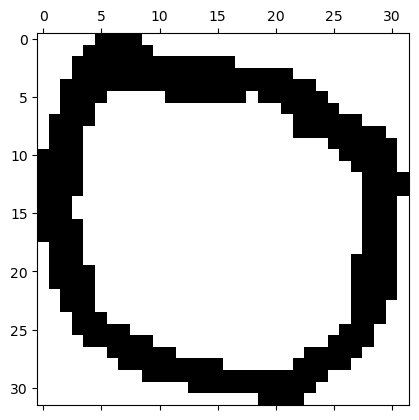

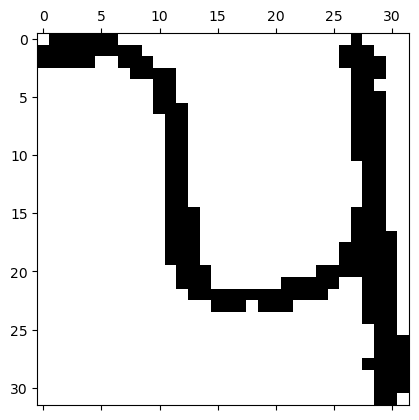

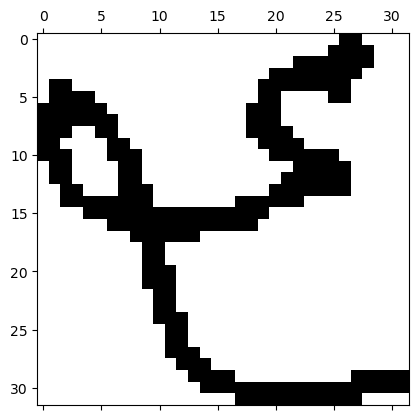

In [36]:
# predict 1st image
plt.matshow(x_test[0],cmap='gray')
y_predicted = model.predict(x_test_scaled)
y_predicted[0]
# this showing the 10 results for the input '0', we need to look for the value which is max
print('Predicted Value is ',np.argmax(y_predicted[0]))
# test some more values
plt.matshow(x_test[88],cmap='gray')
print('Predicted Value is ',np.argmax(y_predicted[34]))
plt.matshow(x_test[177],cmap='gray')
print('Predicted Value is ',np.argmax(y_predicted[177]))

In [22]:
# some predictions may not be not right
# build confusion matrix to see how our prediction looks like
# convert to concrete values
y_predicted_labels=[np.argmax(i) for i in y_predicted]
print(y_predicted_labels, len(y_predicted_labels))
conf_mat = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
conf_mat

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 7, 7, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 7, 7, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 9, 9, 3, 2, 9, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 9, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 1, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9] 178


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[17,  0,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0, 11,  0,  0,  0,  0,  0,  5,  0,  0],
       [ 0,  0, 13,  1,  0,  0,  0,  0,  0,  3],
       [ 0,  0,  0, 17,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 17,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0, 18,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 18,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0, 16,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 18,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 20]])>

Text(95.72222222222221, 0.5, 'Actual')

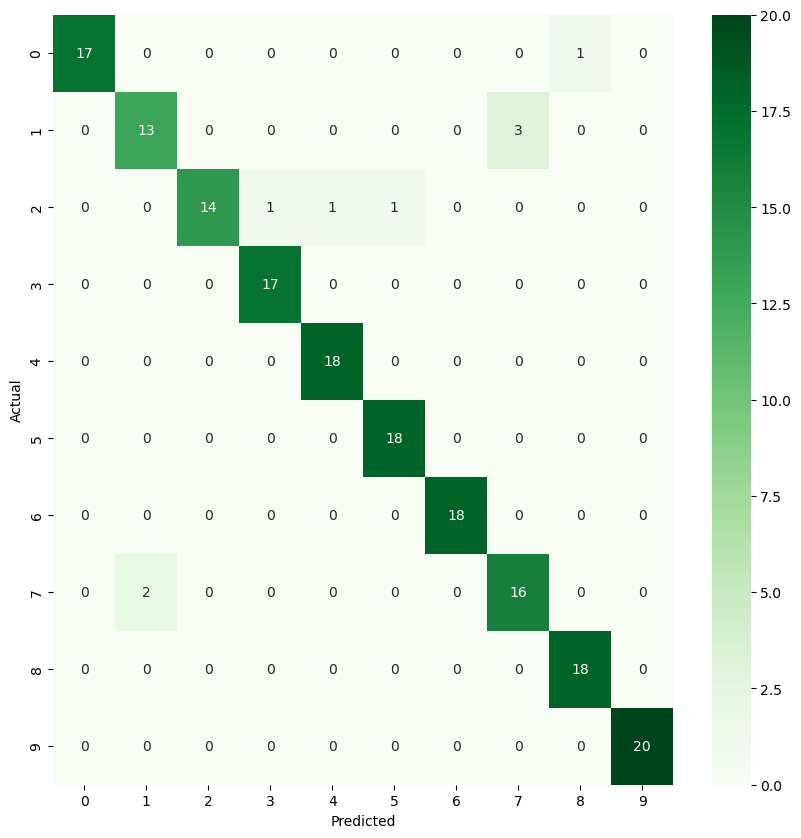

In [37]:
import seaborn as sn
plt.figure(figsize = (10,10))
sn.heatmap(conf_mat,annot=True,fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [38]:
# in 1st Dense layer,the input is 32 x 32 = 1024 neurons, which will give 10 output(numbers from 0 to 9)
# 2nd Dense layer,the input is 10 neurons from above layers output
# we can add more layers for accuracy
model2 = keras.Sequential([
 keras.layers.Flatten(),
 keras.layers.Dense(1024,input_shape=(1024,), activation='relu'),
 keras.layers.Dense(20, activation='softmax')
])
# compile the nn
model2.compile(optimizer='adam',
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy']
 )
# train the model
# some 10 iterations done here
history = model2.fit(x_train_scaled, y_train,epochs= 10, validation_data=(x_test_scaled, y_test))

Epoch 1/10
32/32 [==============================] - 1s 22ms/step - loss: 1.0856 - accuracy: 0.7140 - val_loss: 0.3544 - val_accuracy: 0.9157
Epoch 2/10
32/32 [==============================] - 0s 14ms/step - loss: 0.1553 - accuracy: 0.9400 - val_loss: 0.3614 - val_accuracy: 0.8483
Epoch 3/10
32/32 [==============================] - 0s 8ms/step - loss: 0.1158 - accuracy: 0.9600 - val_loss: 0.3117 - val_accuracy: 0.8989
Epoch 4/10
32/32 [==============================] - 0s 8ms/step - loss: 0.0565 - accuracy: 0.9830 - val_loss: 0.2447 - val_accuracy: 0.9326
Epoch 5/10
32/32 [==============================] - 0s 8ms/step - loss: 0.0592 - accuracy: 0.9830 - val_loss: 0.1982 - val_accuracy: 0.9494
Epoch 6/10
32/32 [==============================] - 0s 9ms/step - loss: 0.0306 - accuracy: 0.9940 - val_loss: 0.1866 - val_accuracy: 0.9438
Epoch 7/10
32/32 [==============================] - 0s 11ms/step - loss: 0.0175 - accuracy: 0.9980 - val_loss: 0.2230 - val_accuracy: 0.9382
Epoch 8/10
32/32 

In [39]:
# Observation : due to multiple layers the compiling will take more time to execute
# we also got amazing accuracy than earlier
# evaluate test dataset on modified model
model2.evaluate(x_test_scaled,y_test)

6/6 [==============================] - 0s 7ms/step - loss: 0.1696 - accuracy: 0.9494


[0.1695616990327835, 0.949438214302063]

In [40]:
y_predicted = model2.predict(x_test_scaled)
y_predicted[0]
y_predicted_labels=[np.argmax(i) for i in y_predicted]
print(y_predicted_labels, len(y_predicted_labels))
conf_mat = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
conf_mat

6/6 [==============================] - 0s 23ms/step
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 7, 7, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 9, 4, 2, 2, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 1, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9] 178


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[17,  0,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0, 13,  0,  0,  0,  0,  0,  3,  0,  0],
       [ 0,  0, 14,  0,  1,  1,  0,  0,  0,  1],
       [ 0,  0,  0, 17,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 18,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 18,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 18,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0, 16,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 18,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 20]])>

Text(95.72222222222221, 0.5, 'Actual')

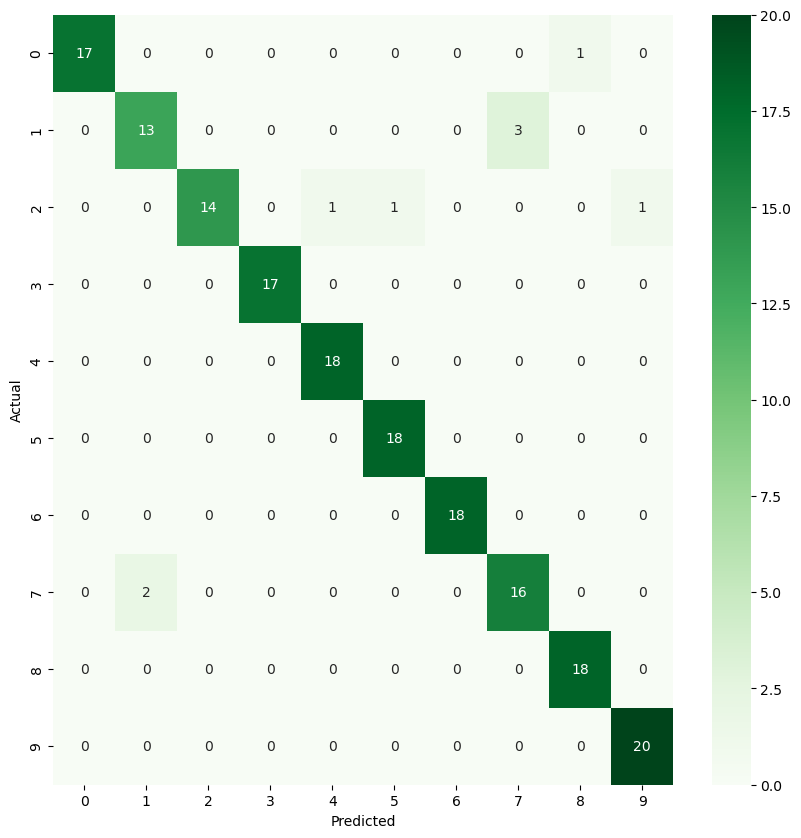

In [41]:
plt.figure(figsize = (10,10))
sn.heatmap(conf_mat,annot=True,fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')

6/6 [==============================] - 0s 16ms/step - loss: 20.3219 - accuracy: 0.9213
Test accuracy: 0.9213483333587646


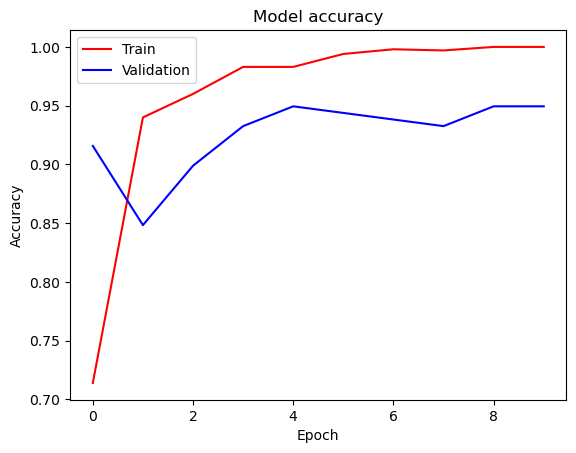

In [43]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'],color='red')
plt.plot(history.history['val_accuracy'],color='blue')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()